In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

import matplotlib.pyplot as plt


In [17]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
X=df.drop(columns=['math score'],axis=1)

In [20]:
Y=df['math score']

In [21]:
# One hot encoding
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform =StandardScaler()
oh_transform= OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transform,cat_features),
        ("StandardScaler",numeric_transform,num_features),
    ]
)



In [22]:
X=preprocessor.fit_transform(X)

In [23]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [24]:
X.shape

(1000, 19)

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [26]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square


In [27]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(),
    "AdaBoost": GradientBoostingRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(Y_train,Y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('-------------------------------------------------------------------------')
    print(f"Training Set Performance: MAE: {model_train_mae}, MSE: {model_train_mse}, RMSE: {model_train_rmse}, R2: {model_train_r2}")
    print(f"Test Set Performance: MAE: {model_test_mae}, MSE: {model_test_mse}, RMSE: {model_test_rmse}, R2: {model_test_r2}")
    r2_list.append(model_test_r2)





    

Linear Regression
-------------------------------------------------------------------------
Training Set Performance: MAE: 4.27826171875, MSE: 28.38021026611328, RMSE: 5.327307975526971, R2: 0.8741160933860179
Test Set Performance: MAE: 4.2271875, MSE: 29.269931640625, RMSE: 5.410169280218965, R2: 0.8797151142580661
Lasso
-------------------------------------------------------------------------
Training Set Performance: MAE: 5.206302661246526, MSE: 43.47840400585579, RMSE: 6.593815587795566, R2: 0.8071462015863456
Test Set Performance: MAE: 5.157881810347763, MSE: 42.50641683841162, RMSE: 6.51969453566742, R2: 0.8253197323627852
Ridge
-------------------------------------------------------------------------
Training Set Performance: MAE: 4.264987823725981, MSE: 28.337788233082446, RMSE: 5.323324922741655, R2: 0.8743042615212909
Test Set Performance: MAE: 4.211100688014259, MSE: 29.056272192348263, RMSE: 5.390387016935636, R2: 0.880593148502874
KNN
--------------------------------------

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879715
8,AdaBoost,0.872441
5,Random Forest,0.852371
7,CatBoost,0.851632
6,XGBoost,0.827797
1,Lasso,0.825320
3,KNN,0.783898
4,Decision Tree,0.737773


**LINEAR REGRESSION**

In [32]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)  # Use predict() instead of fit()
score = r2_score(Y_test, y_pred) * 100
print("Accuracy: ", score)


Accuracy:  87.97151142580661


Text(0, 0.5, 'Predicted')

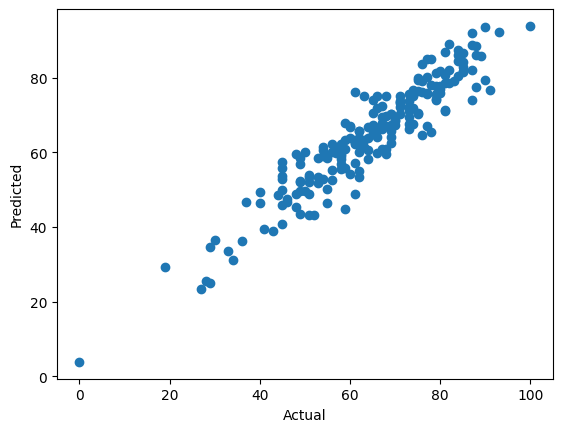

In [36]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [39]:
diff_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred, 'Difference': Y_test - y_pred})
diff_df


,Actual,Predicted,Difference
521,91,76.718750,14.281250
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.140625,8.859375
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750
